<a href="https://colab.research.google.com/github/UdayPuligilla/AI-Driven-Insights-Machine-Learning-Models-for-Chronic-Kidney-Disease-Prediction/blob/main/Model_Building_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Loaded from /content/drive/MyDrive/Chronic kidney disease/datasets/imputed.csv. Shape: (400, 25)
Training set: (320, 24), Test set: (80, 24)
Training Random Forest...

Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



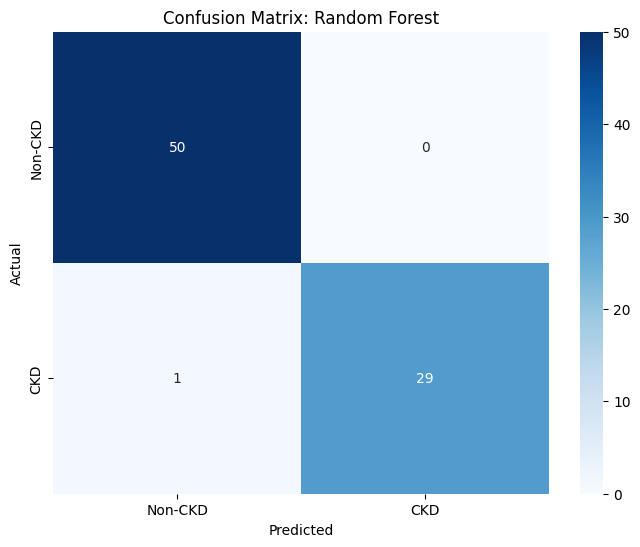

Training Decision Tree...

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.97      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



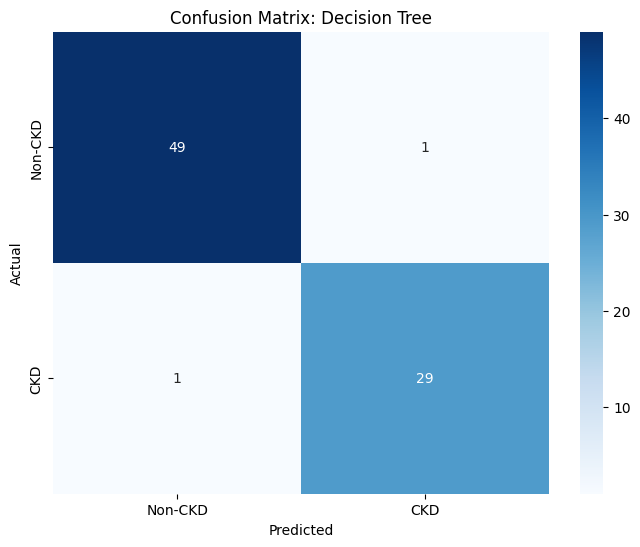

Training K-Nearest Neighbors...

K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



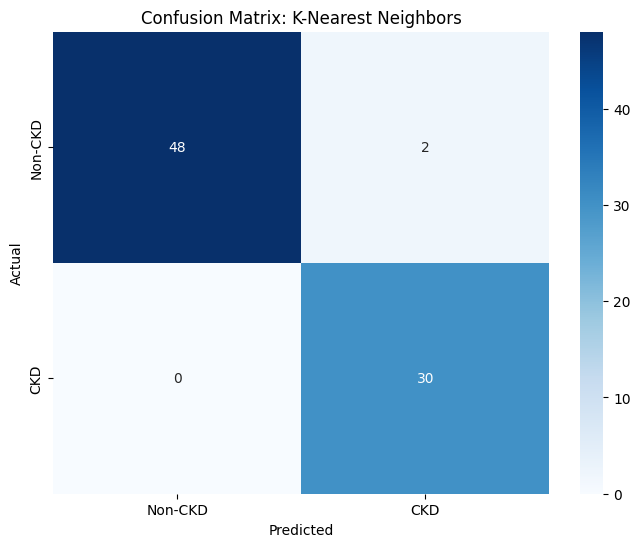

Training Artificial Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Artificial Neural Network Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.97      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



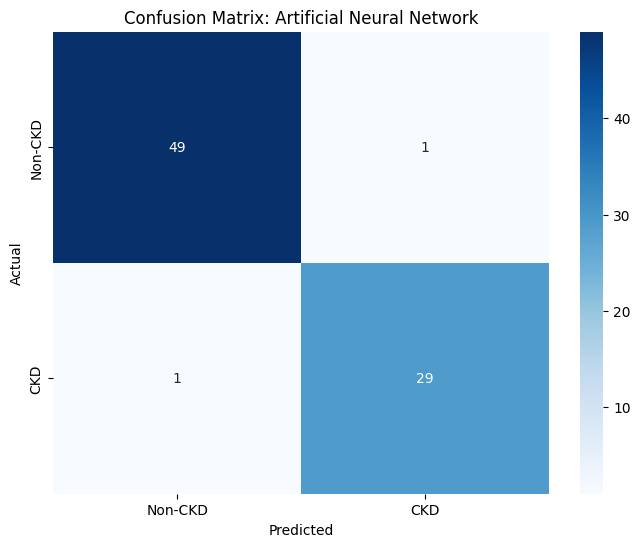


Model Comparison:
Random Forest: Accuracy = 0.9875
Decision Tree: Accuracy = 0.9750
K-Nearest Neighbors: Accuracy = 0.9750
Artificial Neural Network: Accuracy = 0.9750


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler

# File Path for Imputed Dataset
IMPUTED_PATH = '/content/drive/MyDrive/Chronic kidney disease/datasets/imputed.csv'

# Load the Imputed Dataset
def load_imputed_data(file_path):
    data = pd.read_csv(file_path)
    print(f"Dataset Loaded from {file_path}. Shape: {data.shape}")
    return data

# Train-Test Split
def split_data(data):
    X = data.drop(columns=['CKD Stage'])
    y = data['CKD Stage']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
    return X_train, X_test, y_train, y_test

# Visualize Confusion Matrix
def plot_confusion_matrix(cm, title, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Train and Evaluate Models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    # Random Forest
    print("Training Random Forest...")
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    print("\nRandom Forest Results:")
    print(classification_report(y_test, rf_preds))
    cm = confusion_matrix(y_test, rf_preds)
    plot_confusion_matrix(cm, "Random Forest", ["Non-CKD", "CKD"])
    results["Random Forest"] = rf_accuracy

    # Decision Tree
    print("Training Decision Tree...")
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_preds)
    print("\nDecision Tree Results:")
    print(classification_report(y_test, dt_preds))
    cm = confusion_matrix(y_test, dt_preds)
    plot_confusion_matrix(cm, "Decision Tree", ["Non-CKD", "CKD"])
    results["Decision Tree"] = dt_accuracy

    # K-Nearest Neighbors
    print("Training K-Nearest Neighbors...")
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_preds)
    print("\nK-Nearest Neighbors Results:")
    print(classification_report(y_test, knn_preds))
    cm = confusion_matrix(y_test, knn_preds)
    plot_confusion_matrix(cm, "K-Nearest Neighbors", ["Non-CKD", "CKD"])
    results["K-Nearest Neighbors"] = knn_accuracy

    # ANN Model
    print("Training Artificial Neural Network...")
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    y_train_onehot = to_categorical(y_train_encoded)
    y_test_onehot = to_categorical(y_test_encoded)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ann_model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(8, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for binary classification
    ])
    ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    ann_model.fit(X_train_scaled, y_train_onehot, epochs=50, batch_size=16, verbose=0)

    ann_preds = ann_model.predict(X_test_scaled)
    ann_preds_classes = ann_preds.argmax(axis=1)
    ann_preds_labels = label_encoder.inverse_transform(ann_preds_classes)
    ann_accuracy = accuracy_score(y_test, ann_preds_labels)
    print("\nArtificial Neural Network Results:")
    print(classification_report(y_test, ann_preds_labels))
    cm = confusion_matrix(y_test, ann_preds_labels)
    plot_confusion_matrix(cm, "Artificial Neural Network", ["Non-CKD", "CKD"])
    results["Artificial Neural Network"] = ann_accuracy

    # Print Comparison of Results
    print("\nModel Comparison:")
    for model, accuracy in results.items():
        print(f"{model}: Accuracy = {accuracy:.4f}")

# Main Function
def main():
    # Load the imputed dataset
    data = load_imputed_data(IMPUTED_PATH)

    # Split the data
    X_train, X_test, y_train, y_test = split_data(data)

    # Train and evaluate models
    train_and_evaluate_models(X_train, X_test, y_train, y_test)

# Run the Main Function
if __name__ == "__main__":
    main()
